In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sp500 = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/SP500.csv")

In [2]:
print("Last 10 Days of S&P500 Data\n", sp500.head(10))

Last 10 Days of S&P500 Data
         Date     Open     High      Low   Close*  Adj Close**      Volume
0   2-Nov-22  3852.90  3894.44  3758.68  3759.69      3759.69  4899000000
1   1-Nov-22  3901.79  3911.79  3843.80  3856.10      3856.10  4481210000
2  31-Oct-22  3881.85  3893.73  3863.18  3871.98      3871.98  4820620000
3  28-Oct-22  3808.26  3905.42  3808.26  3901.06      3901.06  4459410000
4  27-Oct-22  3834.69  3859.95  3803.79  3807.30      3807.30  4687320000
5  26-Oct-22  3825.97  3886.15  3824.07  3830.60      3830.60  4817310000
6  25-Oct-22  3799.44  3862.85  3799.44  3859.11      3859.11  4843120000
7  24-Oct-22  3762.01  3810.74  3741.65  3797.34      3797.34  4747930000
8  21-Oct-22  3657.10  3757.89  3647.42  3752.75      3752.75  5078020000
9  20-Oct-22  3689.05  3736.00  3656.44  3665.78      3665.78  4496620000


Convert Date column to pandas datetime object, and trim data to 1962 and onward

In [3]:
sp500['DateTime'] = pd.to_datetime(sp500['Date'])
sp500['DateTime'] = np.where(sp500['DateTime'].dt.year > 2022, sp500['DateTime'] - pd.offsets.DateOffset(years=100), sp500['DateTime'])
# Anything after 2022 is changed to have 100 years subtracted because 2022 is the current year, change it as the years progress
sp500 = sp500[sp500['DateTime']>='1962-01-01']

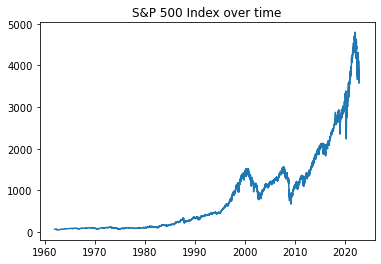

In [4]:
plt.plot(sp500['DateTime'],sp500['Adj Close**'])
plt.title("S&P 500 Index over time")
plt.show()

Perform Log Return Transformation

In [5]:
sp500['log_return'] = 0
for i in range(sp500.shape[0]-1):
    sp500.loc[i,'log_return'] = np.log(sp500.loc[i,'Adj Close**']/sp500.loc[i+1,'Adj Close**'])

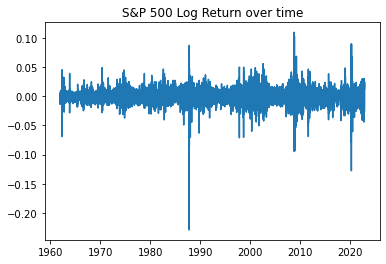

In [6]:
start_date = '1962-01-01'
plt.plot(sp500[sp500['DateTime']>=start_date]['DateTime'],sp500[sp500['DateTime']>=start_date]['log_return'])
plt.title("S&P 500 Log Return over time")
plt.show()

Transform price into log price for time series fitting

In [7]:
sp500['log_price'] = np.log(sp500['Adj Close**'])

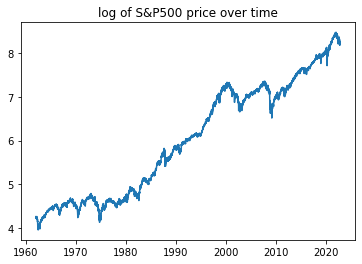

In [8]:
plt.plot(sp500['DateTime'],sp500['log_price'])
plt.title("log of S&P500 price over time")
plt.show()

[-0.00028579]


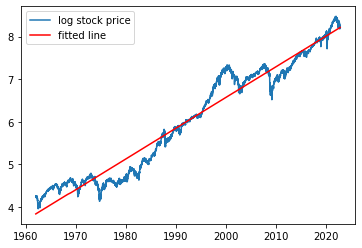

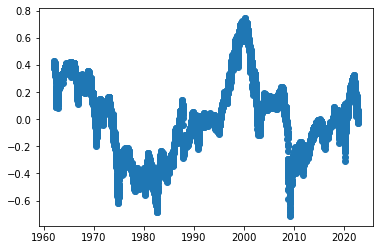

In [9]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
index = sp500.reset_index().index.values.reshape(-1,1)

clf.fit(index, sp500['log_price'])
print(clf.coef_) # To print the coefficient estimate of the series. 
linear_prediction = clf.predict(index)
plt.plot(sp500['DateTime'], sp500['log_price'], label='log stock price')
plt.plot(sp500['DateTime'], linear_prediction, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals = sp500['log_price'] - linear_prediction
plt.plot(sp500['DateTime'], linear_residuals, 'o')
plt.show();

0.00013058239749281798


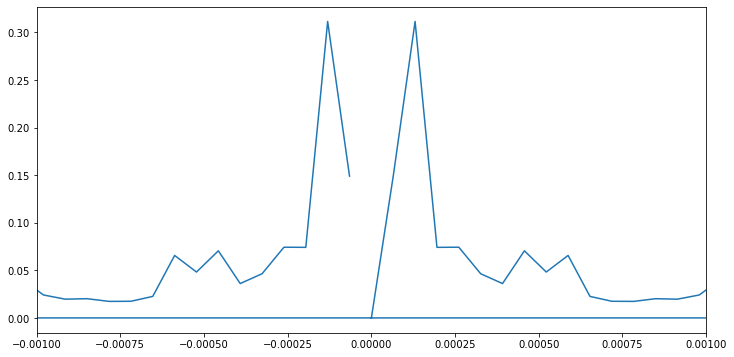

In [29]:
from scipy.fft import fft, fftfreq

fig, ax = plt.subplots(figsize=(12, 6))

x = linear_residuals.to_numpy()
y = fft(x)
xf = fftfreq(len(x))
ax.plot(xf, 2.0/len(x) * np.abs(y))
ax.set_xlim(left = -.001,right = .001)
period_1 = xf[np.argmax(y)]
print(xf[np.argmax(y)])

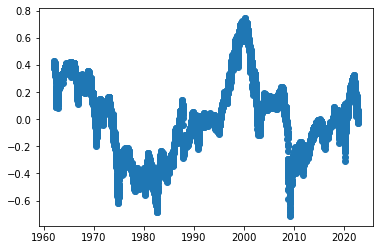

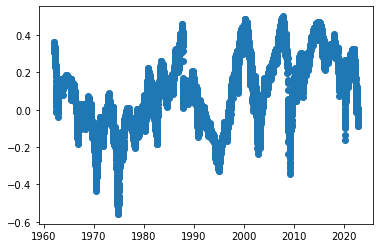

In [47]:
#make periodic residuals
time_index = np.linspace(0,len(x),len(x))
first_period = .4*np.cos(2*np.pi*period_1*time_index-1400)-.1

no_big_period = sp500['log_price'] - linear_prediction - first_period
plt.plot(sp500['DateTime'], linear_residuals, 'o')
plt.show();

plt.plot(sp500['DateTime'], no_big_period, 'o')
plt.show();


Residuals are centered at 0 but not independent from time - there is periodicity

(1531.436723144245-0j)


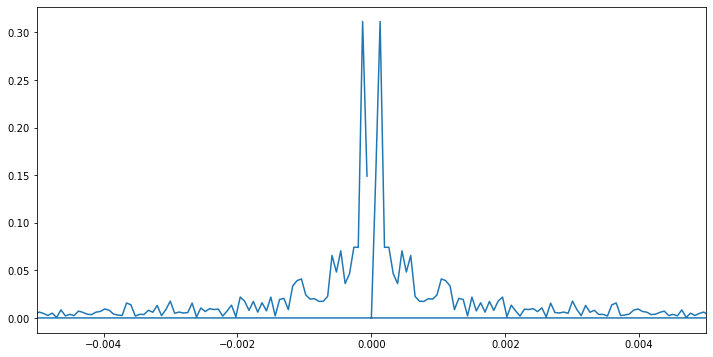

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

prd1 = no_big_period.to_numpy()
yprd1 = fft(prd1)
ax.plot(xf, 2.0/len(x) * np.abs(y))
ax.set_xlim(left = -.005,right = .005)
period_2 = xf[np.argmax(yprd1[0:len(prd1)//2-10])]
print(yprd1[0])